<a href="https://colab.research.google.com/github/KaydenRumsey/Python-Final-Project/blob/main/KaydenRumseyFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install kagglehub

In [ ]:
from google.colab import files
files.upload()

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("andrewmvd/sp-500-stocks")

print("Path to dataset files:", path)

In [ ]:
import os
import pandas as pd

dataset_path = path  # Path to the downloaded dataset

# List the files in the dataset folder to see available files
files = os.listdir(dataset_path)
print("Files in the dataset folder:", files)

file_path = os.path.join(dataset_path, "sp500_companies.csv")  # Change the file name if necessary
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

In [ ]:
# Check for missing values
print("Checking for missing values...")
print(df.isnull().sum())  # Print the number of missing values in each column

# Fill missing numerical values with the column mean
print("Filling missing numerical values with the column mean...")
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    if df[col].isnull().sum() > 0:  # Only fill columns that have missing values
        mean_value = df[col].mean()
        df[col].fillna(mean_value, inplace=True)

# Fill missing categorical values with 'Unknown'
print("Filling missing categorical values with 'Unknown'...")
for col in df.select_dtypes(include=['object']).columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna('Unknown', inplace=True)

# Check for duplicates
print("Checking for duplicate rows...")
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

if duplicates > 0:
    print("Removing duplicate rows...")
    df.drop_duplicates(inplace=True)

# Check data types
print("Checking data types...")
print(df.dtypes)  # Print the current data types of all columns

# Convert 'Date' column to datetime if it exists
if 'Date' in df.columns:
    print("Converting 'Date' column to datetime format...")
    df['Date'] = pd.to_datetime(df['Date'])

# Example: Convert numeric-looking strings to numbers (if any exist)
print("Converting numeric-looking strings to numbers (if applicable)...")
for col in df.columns:
    if df[col].dtype == 'object':  # Check if column is stored as text
        try:
            df[col] = pd.to_numeric(df[col])
        except ValueError:
            print(f"Could not convert column '{col}' to numeric. Keeping as is.")

# Quick final check of the dataset
print("Dataset after cleaning:")
print(df.info())  # Print dataset information to verify changes
print("First few rows of the cleaned dataset:")
print(df.head())  # Show the first few rows of the cleaned data

In [ ]:
# Sort data by Market Cap in descending order
print("Sorting data by Market Cap...")
sorted_df = df.sort_values(by='Marketcap', ascending=False)
print("Top 5 companies by Market Cap:")
print(sorted_df[['Longname', 'Marketcap']].head())

In [ ]:
# Filter data for companies in the Technology sector
print("Filtering data for Technology sector...")
tech_companies = df[df['Sector'] == 'Technology']
print(f"Number of companies in Technology sector: {len(tech_companies)}")

In [ ]:
# Group data by Sector and calculate the average Market Cap
print("Calculating average Market Cap per sector...")
sector_avg_market_cap = df.groupby('Sector')['Marketcap'].mean().reset_index()
print("Average Market Cap per sector:")
print(sector_avg_market_cap)

In [ ]:
# Pivoting
print("Pivoting data to see metrics per sector...")
pivot_df = df.pivot_table(values='Marketcap', index='Sector', aggfunc='mean')
print(pivot_df)

In [ ]:
# Save the manipulated data
manipulated_file_path = "manipulated_data.csv"
df.to_csv(manipulated_file_path, index=False)
print(f"Manipulated data saved to {manipulated_file_path}")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


<ipython-input-44-25a0bd718e9c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sector_avg, x='Sector', y='Marketcap', palette='viridis')


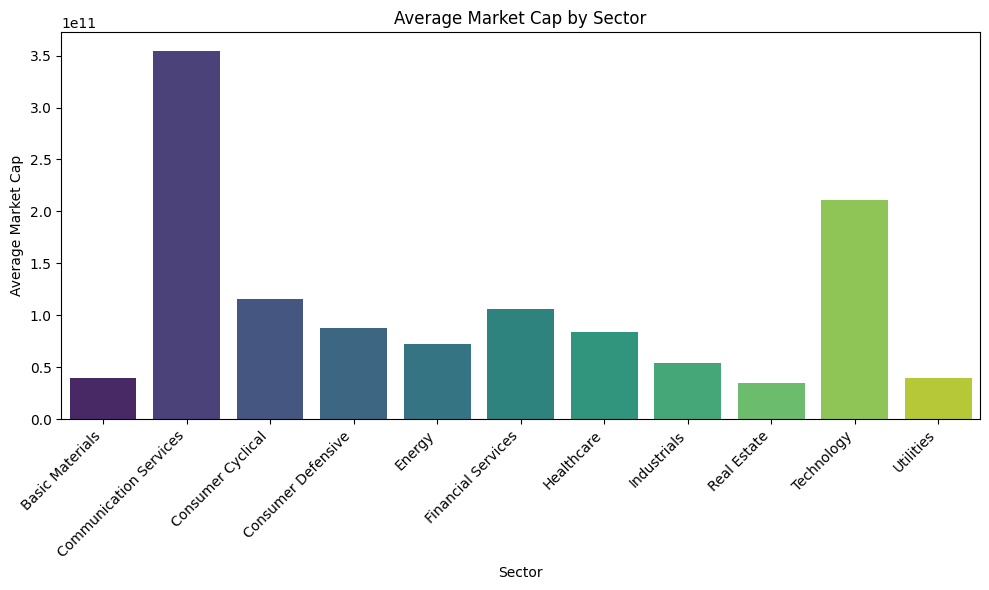

<Figure size 640x480 with 0 Axes>

In [ ]:
# Group data by Sector and calculate average Market Cap
sector_avg = df.groupby('Sector')['Marketcap'].mean().reset_index()

# Bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=sector_avg, x='Sector', y='Marketcap', palette='viridis')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.title('Average Market Cap by Sector')
plt.xlabel('Sector')
plt.ylabel('Average Market Cap')
plt.tight_layout()
plt.show()
plt.savefig('average_market_cap_by_sector.png', dpi=300)

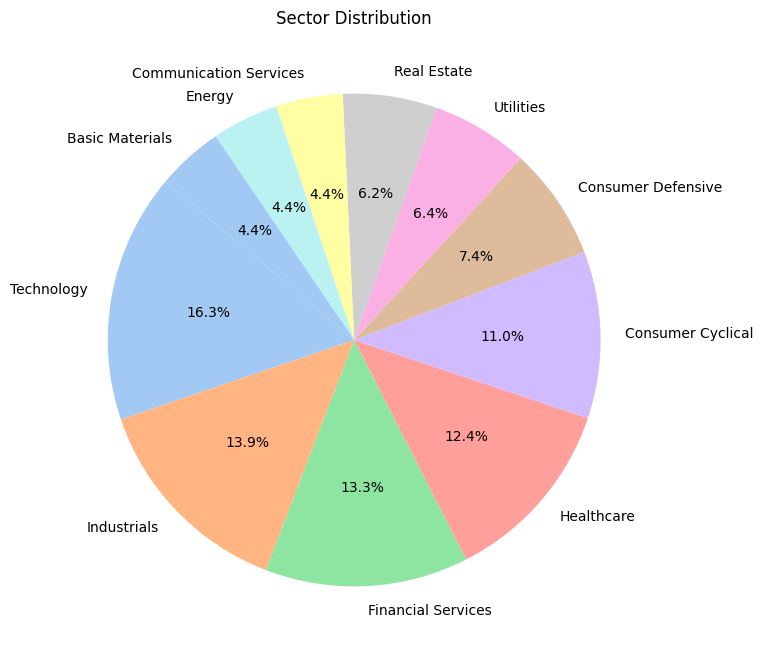

<Figure size 640x480 with 0 Axes>

In [ ]:
# Calculate the number of companies in each sector
sector_count = df['Sector'].value_counts()

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(sector_count, labels=sector_count.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Sector Distribution')
plt.show()
plt.savefig('sectordistibution.png', dpi=300)

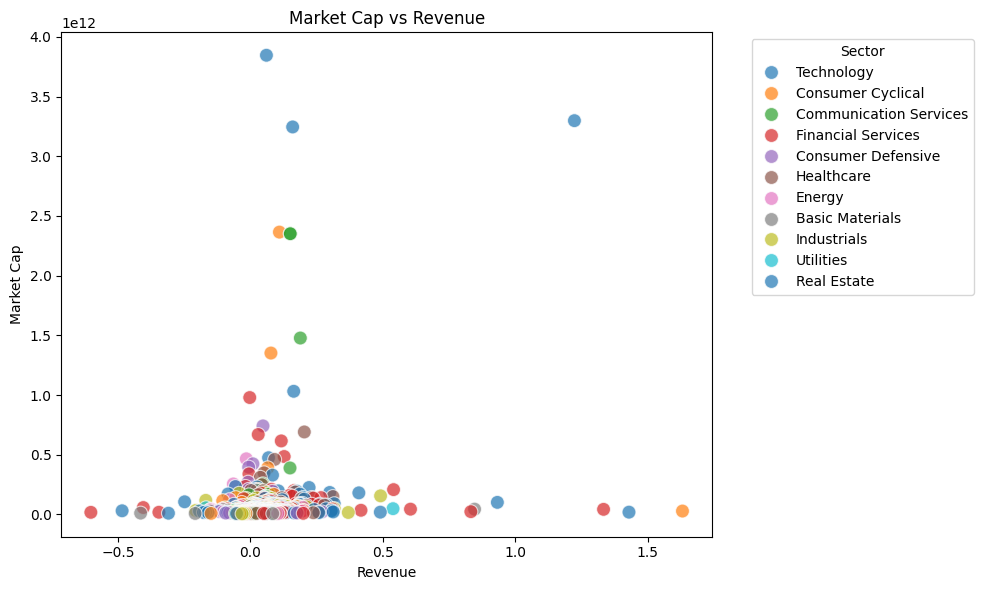

<Figure size 640x480 with 0 Axes>

In [ ]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Revenuegrowth', y='Marketcap', hue='Sector', palette='tab10', s=100, alpha=0.7)
plt.title('Market Cap vs Revenue')
plt.xlabel('Revenue')
plt.ylabel('Market Cap')
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
plt.savefig('MarketCapVsRev.png', dpi=300)

Correlation matrix:
                   Currentprice  Marketcap    Ebitda  Revenuegrowth  \
Currentprice           1.000000   0.045999  0.016447       0.043241   
Marketcap              0.045999   1.000000  0.848521       0.164208   
Ebitda                 0.016447   0.848521  1.000000       0.062528   
Revenuegrowth          0.043241   0.164208  0.062528       1.000000   
Fulltimeemployees     -0.005055   0.334396  0.398976      -0.011673   
Weight                 0.045999   1.000000  0.848521       0.164208   

                   Fulltimeemployees    Weight  
Currentprice               -0.005055  0.045999  
Marketcap                   0.334396  1.000000  
Ebitda                      0.398976  0.848521  
Revenuegrowth              -0.011673  0.164208  
Fulltimeemployees           1.000000  0.334396  
Weight                      0.334396  1.000000  


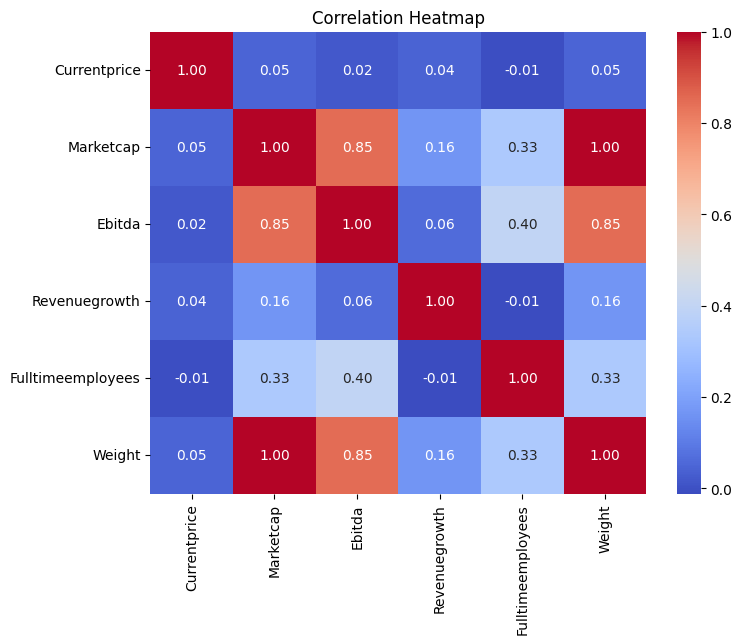

<Figure size 640x480 with 0 Axes>

In [ ]:
# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print("Correlation matrix:")
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
plt.savefig('CorrelationHeatmap.png', dpi=300)

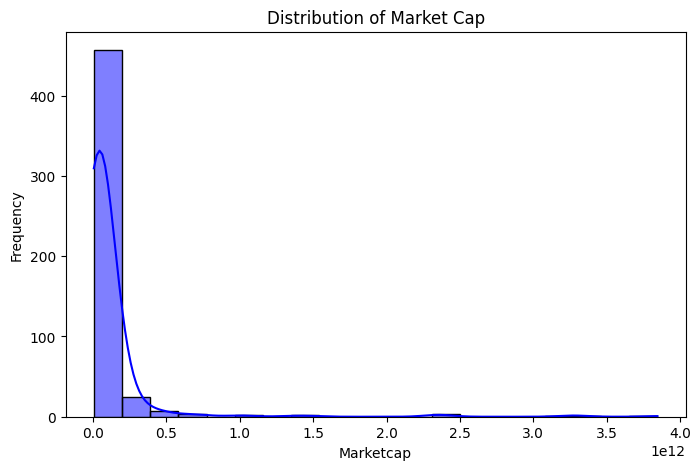

In [ ]:
# Distribution of Market Cap
plt.figure(figsize=(8, 5))
sns.histplot(df['Marketcap'], kde=True, color='blue', bins=20)
plt.title("Distribution of Market Cap")
plt.xlabel("Marketcap")
plt.ylabel("Frequency")
plt.show()

In [ ]:
print("Descriptive Statistics:")
print(df.describe())

Descriptive Statistics:
       Currentprice     Marketcap        Ebitda  Revenuegrowth  \
count    502.000000  5.020000e+02  5.020000e+02     502.000000   
mean     217.893685  1.107222e+11  7.045286e+09       0.070541   
std      489.205027  3.440074e+11  1.576504e+10       0.179706   
min        9.400000  4.664099e+09 -3.991000e+09      -0.602000   
25%       68.547500  1.933417e+10  1.675625e+09       0.002000   
50%      118.365000  3.706396e+10  3.270000e+09       0.051500   
75%      227.667500  7.830565e+10  7.045286e+09       0.109000   
max     8276.780000  3.846820e+12  1.495470e+11       1.632000   

       Fulltimeemployees      Weight  
count       5.020000e+02  502.000000  
mean        5.782761e+04    0.001992  
std         1.383392e+05    0.006189  
min         2.800000e+01    0.000084  
25%         1.035000e+04    0.000348  
50%         2.215000e+04    0.000667  
75%         5.782761e+04    0.001409  
max         2.100000e+06    0.069209  
